In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Temperatur Modell

In [2]:
class Temperature:
    
    days = 365
    
    def __init__(self, hot_year: bool = False, temp_var: int = 2) -> None:
        self.hot_year = hot_year
        self.temp_var = temp_var
        
    def calculate_temperature(self) -> np.ndarray:
        offset = 15 if self.hot_year else 11
        days = np.arange(1, 366)
        temps = 1 + 15 * np.sin(2 * np.pi * (days - 92) / 365) + np.random.uniform(-self.temp_var, self.temp_var, 365) + offset
        return temps
    

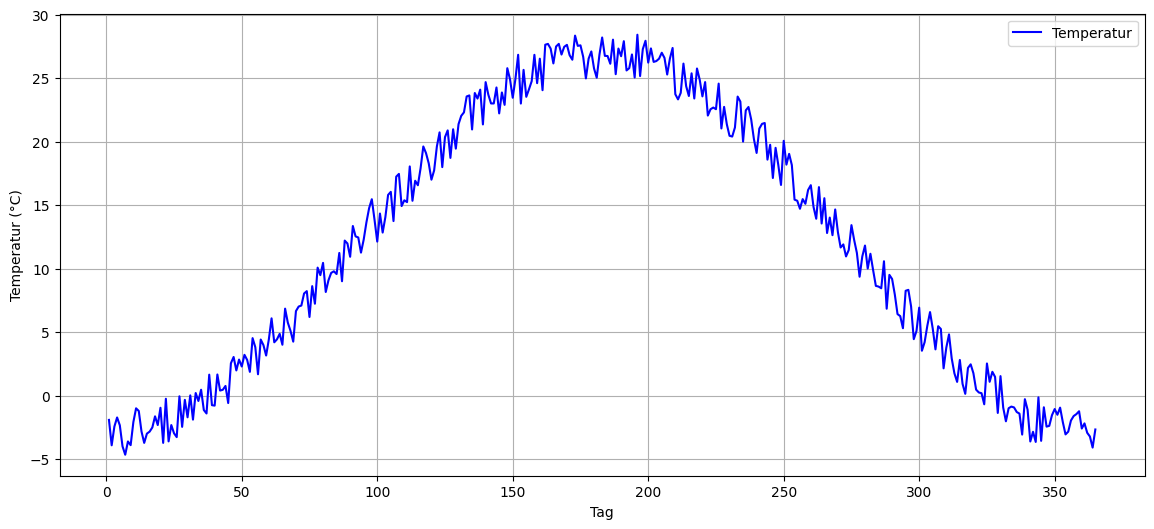

In [8]:
days = np.arange(1, 366)
temps = Temperature().calculate_temperature()

plt.figure(figsize=(14, 6))
plt.plot(days, temps, label='Temperatur', color='blue')
plt.xlabel('Tag')
plt.ylabel('Temperatur (°C)')
plt.grid()
plt.legend()
plt.show()

#### MC Simulation

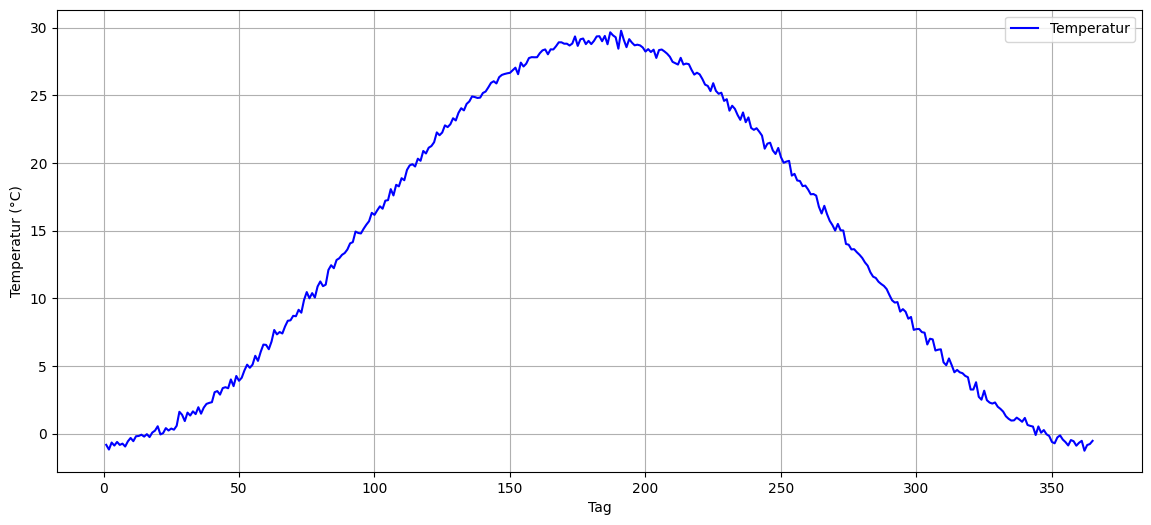

In [9]:
n = 40

temps = []
for _ in range(n):
    temp = Temperature(hot_year=np.random.choice([True, False]), temp_var=np.random.randint(1, 5)).calculate_temperature()
    temps.append(temp)

avg_temp = np.mean(temps, axis=0)
days = np.arange(1, 366)
temps = Temperature().calculate_temperature()

plt.figure(figsize=(14, 6))
plt.plot(days, avg_temp, label='Temperatur', color='blue')
plt.xlabel('Tag')
plt.ylabel('Temperatur (°C)')
plt.grid()
plt.legend()
plt.show()

### Kunden Modell

In [3]:
tage = np.arange(1, 366)
temperaturen = Temperature().calculate_temperature()

In [65]:
tage_im_jahr = 365
fixkosten_pro_tag = 100 # €
variable_kosten_pro_kunde = 0.5 # €

basis_temperatur = 15 # °C, dann gehen kunden gerne eis essen
kunden_basis = temp_var=np.random.randint(50, 60) # zwischen 50 und 60 kunden pro tag
kunden_temperatur_faktor = 5
umsatz_pro_kunde = 5 # €
umsatz_temperatur_faktor = 0.5


# berechnungen
kundenanzahl = kunden_basis + (temperaturen - basis_temperatur) * kunden_temperatur_faktor
kundenanzahl = np.maximum(kundenanzahl, 0) # negative werte auf 0 setzen
umsatz_pro_kunde = umsatz_pro_kunde + (temperaturen - basis_temperatur) * umsatz_temperatur_faktor
gesamt_umsatz = kundenanzahl * umsatz_pro_kunde
gesamt_kosten = fixkosten_pro_tag * np.ones(tage_im_jahr) + variable_kosten_pro_kunde * kundenanzahl

profit = gesamt_umsatz - gesamt_kosten

# Ergebnisse in einem DataFrame speichern
ergebnisse = pd.DataFrame({
    'Tag': tage,
    'Temperatur': temperaturen,
    'Kundenanzahl': kundenanzahl,
    'UmsatzProKunde': umsatz_pro_kunde,
    'Gesamtumsatz': gesamt_umsatz,
    'Gesamtkosten': gesamt_kosten,
    'Profit/Loss': profit
})

print(ergebnisse["Profit/Loss"].sum())

96765.41681430663
